In [53]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# data visualization and exploration

In [77]:
t_data = pd.read_csv("Tweets.csv") # reading data file 

In [78]:
#first five rows of data
t_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [56]:
# first five text
text = t_data['text']
text[0:5]

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [57]:
# total number of negative ,neutral and positive mood
airline_sentiment  = t_data['airline_sentiment'].value_counts()
print airline_sentiment 

negative    9178
neutral     3099
positive    2363
dtype: int64


In [111]:
'''plt.figure(figsize=(8,8))
plt.bar([1,2,3],airline_sentiment)
plt.title("Type of mood ")
plt.xlabel("Mood")
plt.ylabel("Total Mood Count")
plt.xticks([1,2,3],['negative','neutral','positive'])'''

'plt.figure(figsize=(8,8))\nplt.bar([1,2,3],airline_sentiment)\nplt.title("Type of mood ")\nplt.xlabel("Mood")\nplt.ylabel("Total Mood Count")\nplt.xticks([1,2,3],[\'negative\',\'neutral\',\'positive\'])'

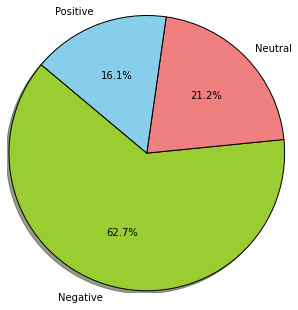

In [110]:
# pie plot for total percentage of airline sentiment
plt.figure(figsize=(5,5))
labels = 'Negative', 'Neutral', 'Positive'
sizes = [9178, 3099, 2363]
colors = ['yellowgreen', 'lightcoral', 'skyblue']
explode = (0, 0, 0) 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

We can clearly say that negative is alost 3 time higher than positive mood which is not good for any airline

In [59]:
# type of airline and number of tweets for each type of airline 
airline = t_data['airline'].value_counts()
print airline

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
dtype: int64


In [112]:
# let's plot of type of airline vs Totol number of each type airline

([<matplotlib.axis.XTick at 0x7f8ecf474d50>,
 <a list of 6 Text xticklabel objects>)

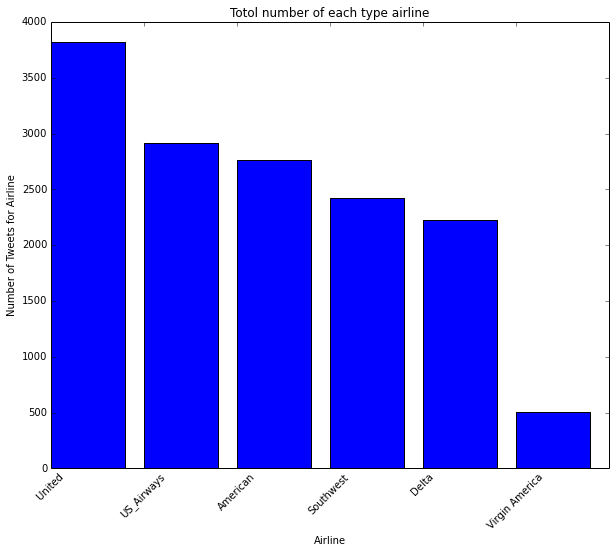

In [113]:
plt.figure(figsize=(10,8))
plt.bar([1,2,3,4,5,6],airline)
plt.xlabel("Airline")
plt.ylabel("Number of Tweets for Airline")
plt.title("Totol number of each type airline")
plt.xticks([1,2,3,4,5,6],['United ','US_Airways','American','Southwest','Delta','Virgin America'],rotation=45)

In [62]:
#negative reasons
negative_reason = t_data['negativereason'].dropna()

In [63]:
List = negative_reason.value_counts().index.tolist()
print List
print negative_reason.value_counts()

['Customer Service Issue', 'Late Flight', "Can't Tell", 'Cancelled Flight', 'Lost Luggage', 'Bad Flight', 'Flight Booking Problems', 'Flight Attendant Complaints', 'longlines', 'Damaged Luggage']
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
dtype: int64


here you can see reason of negative mood are Cancelled Flight, Bad Flight,Late Flight,Customer Service Issue,Flight Booking Problems

# Negative reason for all type of flights

In [64]:
# now lets see all reason for all flight

In [65]:
Index = range(1,(len(negative_reason.unique())+1))
print Index

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


([<matplotlib.axis.XTick at 0x7f8ecf60db50>,
 <a list of 10 Text xticklabel objects>)

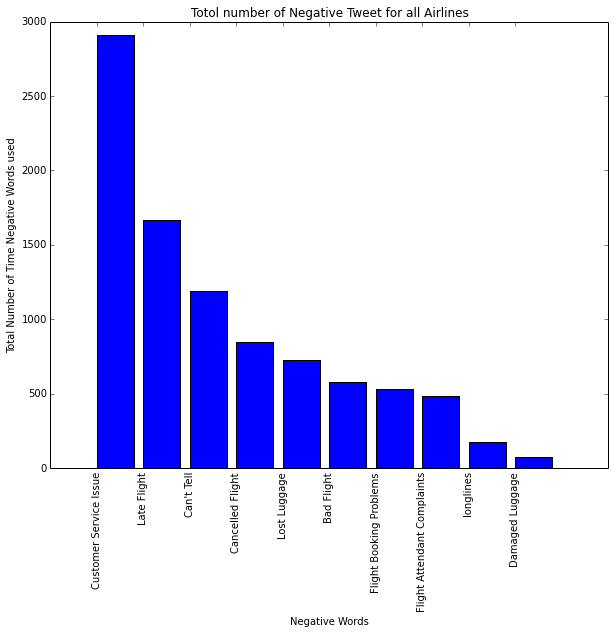

In [118]:
plt.figure(figsize=(10,8))
plt.bar(Index,negative_reason.value_counts())
plt.xlabel("Negative Words")
plt.ylabel("Total Number of Time Negative Words used")
plt.title("Totol number of Negative Tweet for all Airlines")
plt.xticks(Index,List,rotation = 90)

Biggest negative reason are: costomer services are not good , flights are not on time, flights gettig cancelled, laggage lost etc.

# For each flight plot negative reason

In [119]:
def reason_each_flight(airline):
    data = t_data[t_data['airline'] == airline]
    data = data['negativereason']
    data_count = data.value_counts()
    List = data.value_counts().index.tolist()
    Index = range(1,(len(data.unique())))
    plt.bar(Index, data_count)
    plt.xlabel('Negative Words')
    plt.ylabel('Total Number of Time Tweets')
    plt.title('Total number of Time Negative Tweets for ' + airline)
    plt.xticks(Index, List,rotation = 90)

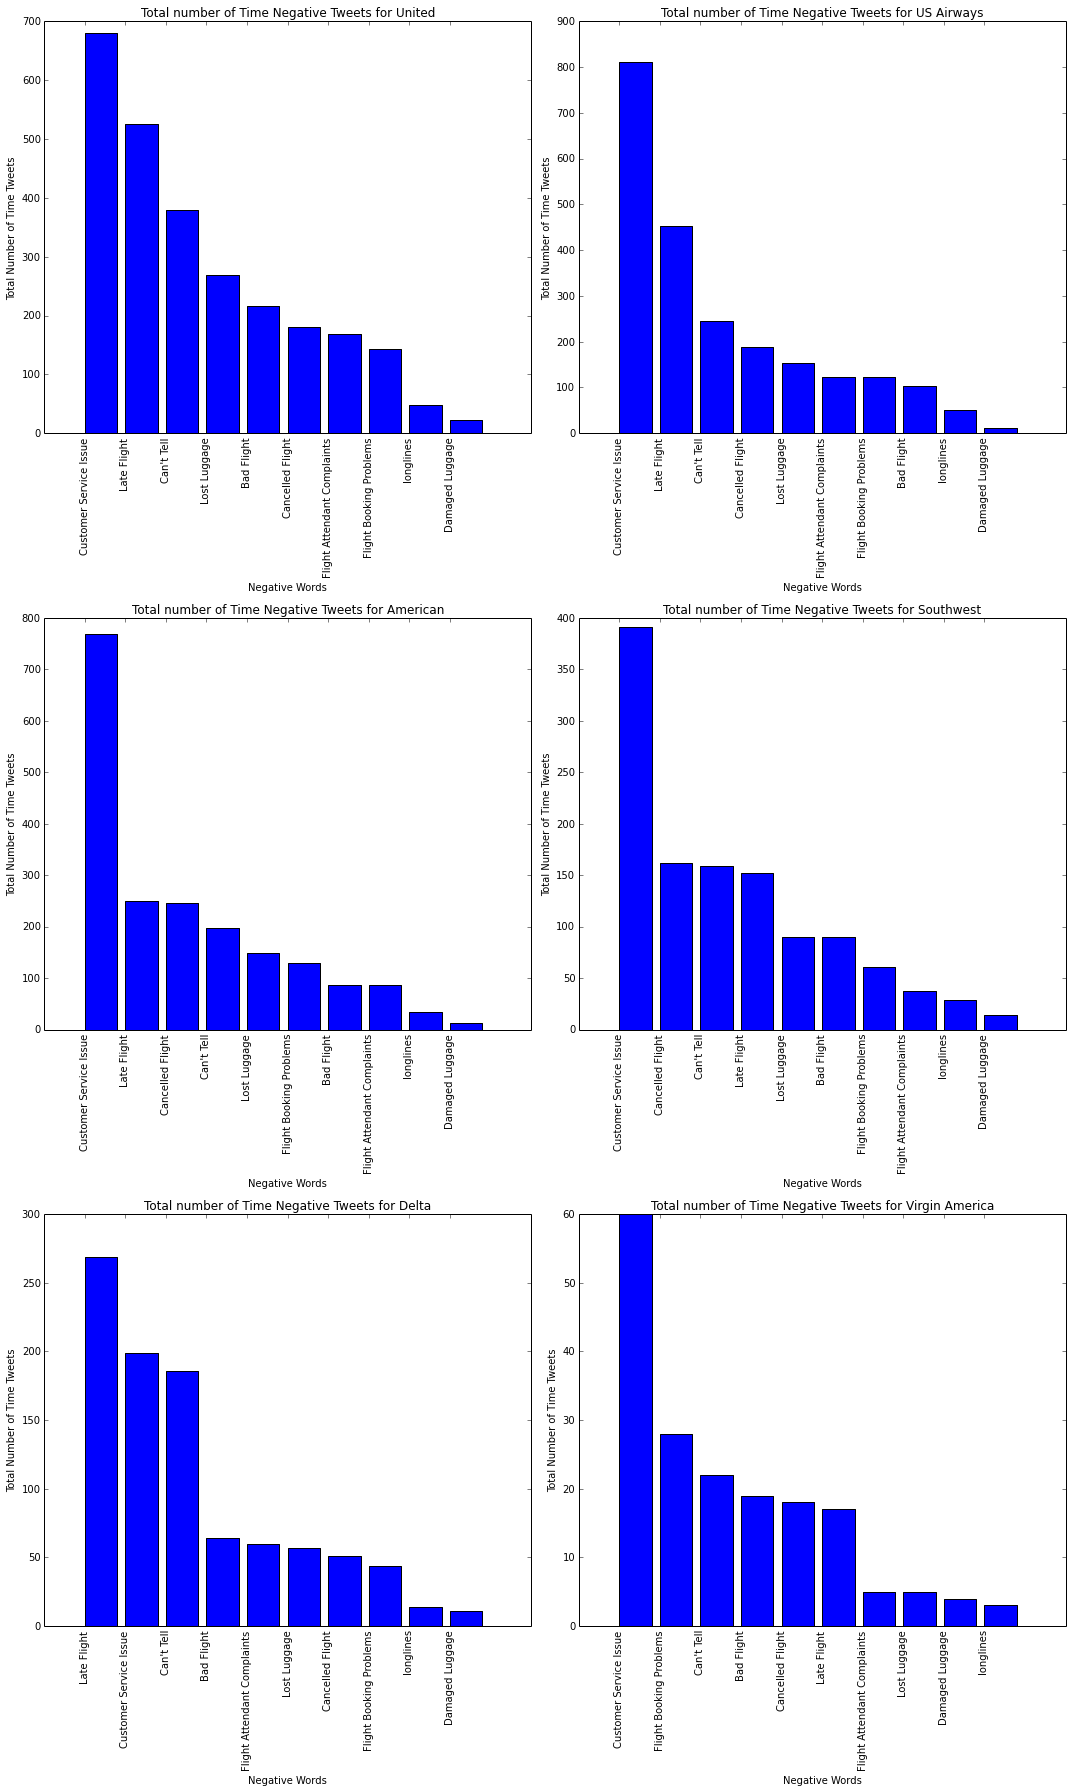

In [120]:
Air = t_data['airline'].value_counts().index.tolist()
plt.figure(1,figsize=(15, 25))
plt.subplot(321)
reason_each_flight(Air[0])
plt.subplot(322)
reason_each_flight(Air[1])
plt.subplot(323)
reason_each_flight(Air[2])
plt.subplot(324)
reason_each_flight(Air[3])
plt.subplot(325)
reason_each_flight(Air[4])
plt.subplot(326)
reason_each_flight(Air[5])
plt.tight_layout()

# Word - Cloud for negative, neutral, positive

In [69]:
#let's make Word Cloud for negative, neutral, positive mood

In [70]:
#import wordcloud and stopwords
from wordcloud import WordCloud,STOPWORDS

# Word Cloud for Negative Mood

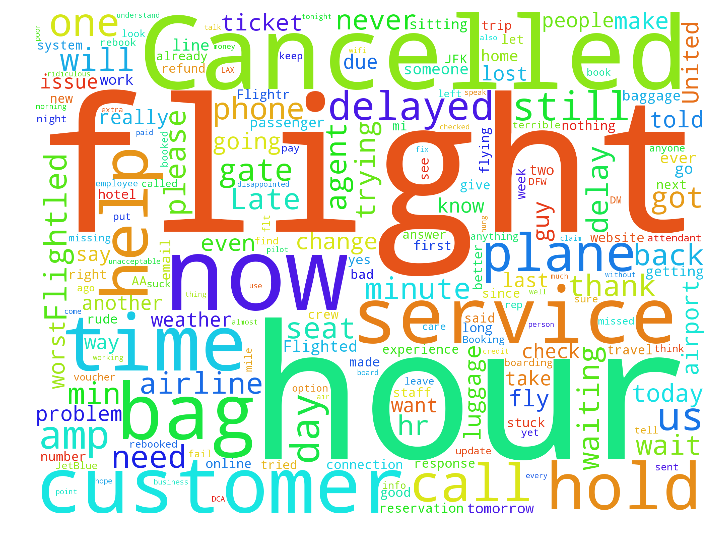

In [71]:
df=t_data[t_data['airline_sentiment']=='negative'] 
# join tweets to a single string
words = ' '.join(df['text'])
# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2000,
                      height=1500
                     ).generate(no_urls_no_tags)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


# Word Cloud for Netural Mood

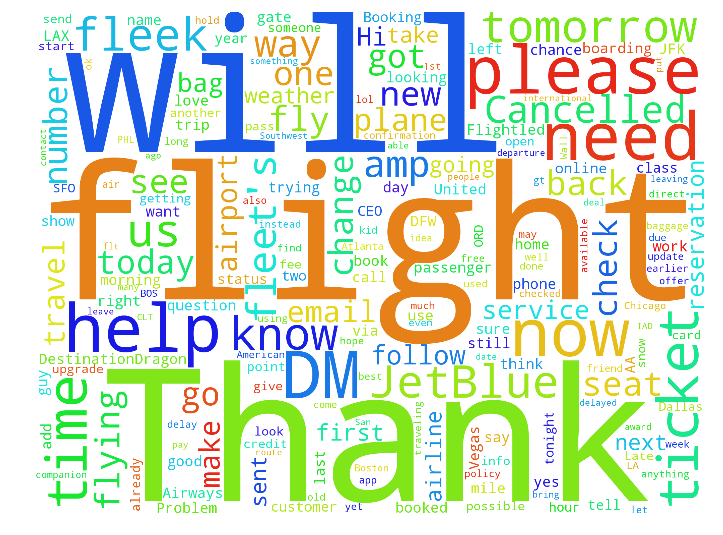

In [72]:
df=t_data[t_data['airline_sentiment']=='neutral'] 
# join tweets to a single string
words = ' '.join(df['text'])
# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2000,
                      height=1500
                     ).generate(no_urls_no_tags)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Word Cloud for Positive Mood

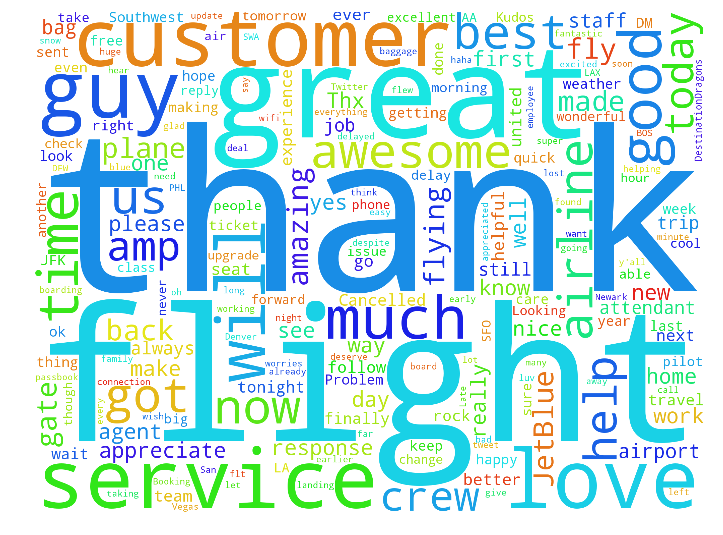

In [73]:
df=t_data[t_data['airline_sentiment']=='positive'] 
# join tweets to a single string
words = ' '.join(df['text'])
# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2000,
                      height=1500
                     ).generate(no_urls_no_tags)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [121]:
#locations from where tweets are coming
location = t_data['tweet_location'].dropna(axis=0, how='all')
print location.count()
print location

9907
2                        Lets Play
6                 San Francisco CA
7                      Los Angeles
8                        San Diego
9                      Los Angeles
10                 1/1 loner squad
11                             NYC
12                             NYC
14               San Francisco, CA
15                   palo alto, ca
16                     west covina
17           this place called NYC
18    Somewhere celebrating life. 
19                Boston | Waltham
22                     Los Angeles
...
14616                  New York City
14617              Columbus, OH, USA
14620    Milwaukee County, Wisconsin
14621             New York, New York
14625                     East Coast
14626        Buenos Aires, Argentina
14628                 Washington, DC
14629                       Waco, TX
14630                Chapel Hill, NC
14631                             US
14633                    Los Angeles
14636                          Texas
14637                 

In [122]:
#cordinats of map from where tweets are coming 
t = t_data['tweet_coord'].dropna(axis = 0, how="all")
print t.count()
print t

1019
21      [40.74804263, -73.99295302]
28        [42.361016, -71.02000488]
29      [33.94540417, -118.4062472]
32     [33.94209449, -118.40410103]
34        [33.2145038, -96.9321504]
42      [34.0219817, -118.38591198]
62     [33.57963333, -117.73024772]
69       [40.6413712, -73.78311558]
74     [36.08457854, -115.13780136]
85                       [0.0, 0.0]
103                      [0.0, 0.0]
106                      [0.0, 0.0]
107                      [0.0, 0.0]
108    [37.79374402, -122.39327564]
115        [26.074379, -80.1416831]
...
14447    [47.24879409, -122.43874458]
14481       [40.6474324, -73.7936881]
14483     [32.97609561, -96.53349238]
14490      [40.68621427, -74.1793971]
14511     [44.26313964, -69.78197616]
14524     [40.80718573, -73.95477259]
14525      [38.5369071, -106.9349375]
14528       [38.538038, -106.9370467]
14555     [33.64199395, -84.44238523]
14561     [32.90771571, -97.04233322]
14577    [33.93939612, -118.38973148]
14596    [35.22534456, -106.57241

# World Map and State Map